<a href="https://colab.research.google.com/github/chandana-koganti14/BrainTumor/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.5/709.5 kB 13.3 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
model = YOLO('yolov8n-seg.yaml')
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 288MB/s]


In [4]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [5]:
%cat /content/drive/MyDrive/InstanceSegmentation/data.yaml

train: /content/drive/MyDrive/InstanceSegmentation/train/images
val: /content/drive/MyDrive/InstanceSegmentation/valid/images
test: /content/drive/MyDrive/InstanceSegmentation/test/images

nc: 3
names: ['tumor_good_chance', 'tumor_less_chance', 'tumor_moderate_chance']

roboflow:
  workspace: mycollege
  project: tumor-detection-2
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/mycollege/tumor-detection-2/dataset/5

In [6]:
import yaml
with open("/content/drive/MyDrive/InstanceSegmentation/data.yaml", 'r') as stream: num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
project = "/content/drive/MyDrive/InstanceSegmentation/results"
name = "100_epochs-"

In [ ]:
results = model.train(data='/content/drive/MyDrive/InstanceSegmentation/data.yaml', project=project, name=name, epochs=100, patience=0, batch=4, imgsz=640)

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/InstanceSegmentation/data.yaml, epochs=100, time=None, patience=0, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/InstanceSegmentation/results, name=100_epochs-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

train: Scanning /content/drive/MyDrive/InstanceSegmentation/train/labels.cache... 1211 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1211/1211 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/InstanceSegmentation/train/images/y1385_jpg.rf.9902ff989118c43582a6bc810beced58.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1667      2.3333        1.25]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/InstanceSegmentation/valid/labels.cache... 349 images, 0 backgrounds, 0 corrupt: 100%|██████████| 349/349 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.07G     0.3788      0.515      1.138      1.045          7        640: 100%|██████████| 303/303 [00:54<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.97it/s]


                   all        349        349      0.385      0.854      0.541      0.491      0.385      0.854      0.541      0.504

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.992G     0.3694     0.4814      1.118      1.022          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.93it/s]


                   all        349        349      0.445      0.768      0.537      0.481      0.445      0.768      0.537      0.512

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.988G     0.3846     0.4952      1.101      1.036          7        640: 100%|██████████| 303/303 [00:50<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.49it/s]

                   all        349        349      0.399      0.796      0.502      0.476      0.401      0.796      0.502      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.986G     0.3858       0.49      1.085      1.038          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.00it/s]

                   all        349        349      0.437      0.654      0.485      0.447      0.437      0.654      0.485      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.967G     0.3933     0.4959      1.089       1.04          5        640: 100%|██████████| 303/303 [00:52<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.67it/s]

                   all        349        349       0.37      0.772      0.398      0.371       0.37      0.772      0.398      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.984G     0.3821     0.4845      1.084      1.035          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.61it/s]

                   all        349        349      0.493      0.737      0.558      0.539      0.493      0.737      0.558      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.986G     0.3626     0.4739      1.048      1.022          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.67it/s]

                   all        349        349      0.438      0.688      0.561      0.541      0.438      0.688      0.561      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.984G     0.3555     0.4517      1.043      1.013          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.63it/s]


                   all        349        349      0.424      0.694       0.57      0.544      0.427      0.684      0.566      0.365

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      0.99G     0.3577     0.4811      1.042      1.025          4        640: 100%|██████████| 303/303 [00:50<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.55it/s]

                   all        349        349      0.402      0.725      0.516      0.465      0.402      0.725      0.516       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.984G     0.3336     0.4585      1.023      1.003          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.18it/s]

                   all        349        349      0.492      0.746      0.548      0.525      0.492      0.746      0.548       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.984G     0.3466     0.4733      1.027      1.009          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.89it/s]

                   all        349        349      0.455      0.815      0.571      0.545      0.455      0.815       0.57      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.984G     0.3371      0.468      1.006     0.9955          5        640: 100%|██████████| 303/303 [00:51<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.57it/s]

                   all        349        349       0.49      0.759      0.559      0.519       0.49      0.759      0.559      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.984G     0.3396     0.4557      1.005      1.007          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.71it/s]

                   all        349        349      0.471      0.806      0.564      0.553      0.471      0.806      0.564      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.963G     0.3366     0.4674       1.01      1.005          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.75it/s]

                   all        349        349       0.46      0.771      0.574      0.546       0.46      0.771      0.574      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.967G     0.3168     0.4651      1.007     0.9901          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.51it/s]

                   all        349        349      0.504      0.721      0.587      0.562      0.504      0.721      0.587      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.942G     0.3327     0.4636     0.9984      1.009          6        640: 100%|██████████| 303/303 [00:52<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.03it/s]

                   all        349        349      0.483      0.749      0.575      0.553      0.483      0.749      0.575      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.988G     0.3154     0.4457      1.002     0.9909          5        640: 100%|██████████| 303/303 [00:51<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.88it/s]

                   all        349        349      0.482      0.792      0.529       0.51      0.482      0.792      0.529       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.963G     0.3069     0.4382     0.9787     0.9889          4        640: 100%|██████████| 303/303 [00:51<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.54it/s]

                   all        349        349      0.474      0.721      0.549      0.509      0.474      0.721      0.549      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.963G     0.3209      0.466     0.9887     0.9924          8        640: 100%|██████████| 303/303 [00:50<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.14it/s]


                   all        349        349       0.45       0.79      0.597      0.563       0.45       0.79      0.597      0.582

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.994G     0.3098     0.4317      0.972     0.9901          3        640: 100%|██████████| 303/303 [00:51<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.79it/s]

                   all        349        349      0.457      0.816       0.56      0.543      0.457      0.816       0.56      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.984G     0.3212     0.4734      0.981     0.9981          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.55it/s]

                   all        349        349      0.482      0.797      0.587      0.572      0.482      0.797      0.587      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.986G     0.3043      0.449     0.9864     0.9858          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.19it/s]

                   all        349        349      0.502      0.754      0.574      0.567      0.502      0.754      0.574      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.963G     0.2984     0.4385     0.9781     0.9813          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.06it/s]

                   all        349        349      0.481      0.817       0.58      0.556      0.481      0.817       0.58      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.988G     0.2993     0.4475     0.9669     0.9739          5        640: 100%|██████████| 303/303 [00:52<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.61it/s]

                   all        349        349      0.489       0.84       0.59      0.582      0.489       0.84       0.59      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      0.96G     0.3058     0.4407     0.9669     0.9857          4        640: 100%|██████████| 303/303 [00:51<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.27it/s]

                   all        349        349      0.496      0.805      0.577      0.566      0.496      0.805      0.577      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.984G     0.2963     0.4289     0.9629     0.9793          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.01it/s]

                   all        349        349      0.505      0.735      0.568      0.513      0.505      0.735      0.568      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.984G     0.2988     0.4376     0.9659     0.9771          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.66it/s]

                   all        349        349      0.491      0.763      0.589      0.565      0.491      0.763      0.589      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.965G     0.2902     0.4446     0.9518     0.9766          5        640: 100%|██████████| 303/303 [00:50<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.77it/s]

                   all        349        349      0.531      0.777       0.59      0.568      0.531      0.777       0.59      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.984G     0.2963     0.4404     0.9515     0.9804          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.00it/s]

                   all        349        349      0.523      0.786      0.591      0.575      0.523      0.786      0.591       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.986G     0.3014     0.4324     0.9557     0.9898          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.11it/s]

                   all        349        349      0.527      0.785      0.571      0.554      0.527      0.785      0.571      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.963G      0.291     0.4285     0.9517     0.9743          6        640: 100%|██████████| 303/303 [00:50<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.66it/s]

                   all        349        349        0.5      0.801      0.566       0.55        0.5      0.801      0.566      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      0.96G     0.2942     0.4337     0.9635     0.9799          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.85it/s]

                   all        349        349      0.469      0.749      0.577      0.551      0.469      0.749      0.577      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.984G     0.2819      0.416     0.9469     0.9715          6        640: 100%|██████████| 303/303 [00:52<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.67it/s]

                   all        349        349      0.476      0.838      0.577       0.56      0.476      0.838      0.577      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.984G     0.2898     0.4315     0.9596     0.9795          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.71it/s]

                   all        349        349      0.468      0.802      0.591      0.558      0.468      0.802      0.591      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.984G     0.2768     0.4258     0.9562     0.9755          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.57it/s]

                   all        349        349      0.498      0.764      0.564       0.54      0.498      0.764      0.564      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.984G     0.2752     0.4244     0.9378     0.9724          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]


                   all        349        349       0.45      0.791      0.579      0.559       0.45      0.791      0.579      0.565

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.986G     0.2799     0.4245      0.938     0.9745          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.57it/s]

                   all        349        349      0.483      0.771      0.576      0.563      0.483      0.771      0.576      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.984G      0.275      0.419     0.9421     0.9711          7        640: 100%|██████████| 303/303 [00:50<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.61it/s]

                   all        349        349      0.492       0.79      0.593      0.574      0.492       0.79      0.593      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.963G     0.2756     0.4117      0.942     0.9711          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.88it/s]

                   all        349        349      0.488        0.8      0.583      0.573      0.488        0.8      0.583      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      0.96G     0.2778     0.4327     0.9142     0.9695          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.92it/s]


                   all        349        349      0.526      0.812      0.607      0.595      0.526      0.812      0.607      0.598

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      0.96G     0.2617     0.4119     0.9118       0.96          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.52it/s]

                   all        349        349       0.56      0.722      0.607      0.592       0.56      0.722      0.607        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.963G     0.2718     0.4231     0.9264     0.9671          7        640: 100%|██████████| 303/303 [00:52<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.87it/s]

                   all        349        349      0.521      0.774      0.609      0.586      0.521      0.774      0.609      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.984G     0.2624     0.4143     0.9269      0.968          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.60it/s]

                   all        349        349      0.514      0.807        0.6      0.594      0.514      0.807        0.6      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.984G     0.2718     0.4265     0.9068     0.9699          6        640: 100%|██████████| 303/303 [00:50<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.98it/s]

                   all        349        349      0.537      0.764      0.609      0.601      0.537      0.764      0.609      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.988G     0.2639     0.4176     0.9295     0.9613          5        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.88it/s]

                   all        349        349      0.501      0.802      0.611      0.598      0.501      0.802      0.611      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.981G     0.2606     0.4042     0.9129     0.9645          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.57it/s]


                   all        349        349      0.514       0.81      0.607      0.599      0.514       0.81      0.607      0.602

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.984G     0.2634     0.4121     0.9137      0.961          7        640: 100%|██████████| 303/303 [00:50<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.58it/s]

                   all        349        349      0.489      0.817      0.609      0.596      0.489      0.817      0.609      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.984G     0.2636     0.4173     0.9243     0.9688          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.89it/s]

                   all        349        349      0.502      0.793      0.603      0.571      0.502      0.793      0.603      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.984G       0.26     0.4167     0.8976      0.959          6        640: 100%|██████████| 303/303 [00:52<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.78it/s]


                   all        349        349      0.471      0.789      0.597      0.586      0.471      0.789      0.597      0.592

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.986G     0.2695      0.422     0.9089      0.964          4        640: 100%|██████████| 303/303 [00:50<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.82it/s]

                   all        349        349      0.512      0.773        0.6      0.585      0.512      0.773        0.6      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       1.1G     0.2624     0.4117     0.9205     0.9623          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.03it/s]

                   all        349        349      0.507      0.822      0.622      0.616      0.507      0.822      0.622      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.981G     0.2548     0.4094     0.9079      0.955          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.89it/s]

                   all        349        349      0.514      0.789       0.61        0.6      0.514      0.789       0.61      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.967G     0.2549     0.4174     0.9014     0.9577          5        640: 100%|██████████| 303/303 [00:50<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.58it/s]

                   all        349        349      0.498      0.786      0.621      0.614      0.498      0.786      0.621      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.981G     0.2524     0.4112     0.8937     0.9499          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.94it/s]

                   all        349        349      0.501      0.794      0.592      0.579      0.501      0.794      0.592      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.981G     0.2512     0.4148     0.9005     0.9555          5        640: 100%|██████████| 303/303 [00:52<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.72it/s]

                   all        349        349      0.531      0.739      0.636      0.625      0.531      0.739      0.636      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.963G     0.2473     0.4153     0.8971     0.9497          5        640: 100%|██████████| 303/303 [00:51<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.51it/s]

                   all        349        349      0.544      0.754      0.634      0.615      0.544      0.754      0.634      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.984G     0.2518     0.4062     0.8884     0.9524          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.88it/s]

                   all        349        349       0.53      0.793      0.638       0.63       0.53      0.793      0.638      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.981G     0.2522     0.4056     0.9013     0.9553          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.76it/s]

                   all        349        349      0.551      0.706      0.628      0.626      0.551      0.706      0.628      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.981G     0.2527     0.4053     0.9057     0.9598          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.58it/s]

                   all        349        349      0.539      0.781      0.608      0.591      0.539      0.781      0.608      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      0.96G     0.2404     0.4007     0.8888     0.9489          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.81it/s]

                   all        349        349       0.51      0.785      0.628      0.627       0.51      0.785      0.628      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.963G     0.2435     0.3924     0.8791     0.9482          4        640: 100%|██████████| 303/303 [00:52<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.97it/s]


                   all        349        349      0.525      0.797      0.631      0.598      0.525      0.797      0.631      0.622

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.981G     0.2526     0.4061     0.8812     0.9576          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.36it/s]

                   all        349        349      0.444      0.892      0.557       0.55      0.444      0.892      0.557      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      0.96G     0.2543     0.4179     0.8932     0.9615          8        640: 100%|██████████| 303/303 [00:55<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.29it/s]

                   all        349        349      0.507      0.833      0.654       0.65      0.507      0.833      0.654       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.981G     0.2443     0.3986     0.8912     0.9557          6        640: 100%|██████████| 303/303 [00:54<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.28it/s]

                   all        349        349      0.498      0.837      0.612      0.607      0.498      0.837      0.612      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      0.96G     0.2371     0.3888     0.8816     0.9519          7        640: 100%|██████████| 303/303 [00:55<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.53it/s]

                   all        349        349       0.57      0.738      0.651      0.638       0.57      0.738      0.651      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.986G     0.2522     0.4007     0.8906     0.9586          5        640: 100%|██████████| 303/303 [00:54<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.25it/s]

                   all        349        349        0.5      0.799      0.627      0.624        0.5      0.799      0.627      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.984G     0.2423     0.3985      0.885     0.9502          8        640: 100%|██████████| 303/303 [00:55<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.76it/s]

                   all        349        349      0.482      0.786      0.639      0.635      0.482      0.786      0.639      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.984G     0.2464     0.3993     0.8702     0.9539          8        640: 100%|██████████| 303/303 [00:54<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.45it/s]

                   all        349        349      0.531       0.75      0.624      0.604      0.531       0.75      0.624      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.984G     0.2347     0.3927     0.8514      0.946          7        640: 100%|██████████| 303/303 [00:53<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.29it/s]

                   all        349        349      0.529      0.786      0.651      0.647      0.529      0.786      0.651      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      0.96G      0.242     0.3986     0.8691     0.9486          8        640: 100%|██████████| 303/303 [00:53<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.78it/s]


                   all        349        349      0.525      0.781      0.608      0.605      0.525      0.781      0.608      0.602

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.963G     0.2373     0.4077     0.8765     0.9473          7        640: 100%|██████████| 303/303 [00:52<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.48it/s]

                   all        349        349      0.545      0.756      0.653      0.636      0.545      0.756      0.653      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.963G     0.2423     0.3954     0.8863     0.9518          6        640: 100%|██████████| 303/303 [00:53<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.80it/s]

                   all        349        349        0.5       0.83      0.645      0.636        0.5       0.83      0.645      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.963G     0.2384     0.4035      0.865     0.9523          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.13it/s]

                   all        349        349      0.592      0.677      0.655       0.64      0.592      0.677      0.655       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      0.96G     0.2347     0.3847     0.8764     0.9477          8        640: 100%|██████████| 303/303 [00:50<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.63it/s]

                   all        349        349      0.527      0.791      0.641      0.634      0.527      0.791      0.641      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.981G     0.2357     0.4062     0.8585     0.9497          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.15it/s]

                   all        349        349       0.53      0.772      0.661      0.653       0.53      0.772      0.661      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.981G     0.2333     0.4039     0.8798     0.9434          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.83it/s]

                   all        349        349      0.514      0.802      0.646      0.641      0.514      0.802      0.646      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      0.96G     0.2253     0.3854     0.8541     0.9411          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.66it/s]

                   all        349        349      0.561       0.71      0.662      0.656      0.561       0.71      0.662      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.984G     0.2313     0.3831     0.8753     0.9411          6        640: 100%|██████████| 303/303 [00:51<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.53it/s]

                   all        349        349      0.536      0.724      0.646       0.64      0.536      0.724      0.646      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100       1.1G     0.2317     0.3961     0.8609     0.9422          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.85it/s]

                   all        349        349      0.526      0.754      0.628      0.622      0.526      0.754      0.628      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100       1.1G     0.2253     0.3823     0.8242     0.9468          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.76it/s]

                   all        349        349      0.481      0.872      0.608      0.598      0.481      0.872      0.608      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.981G     0.2373     0.4053      0.845     0.9489          8        640: 100%|██████████| 303/303 [00:51<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.97it/s]

                   all        349        349      0.549      0.746       0.64      0.639      0.549      0.746       0.64      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.958G     0.2259     0.3802     0.8521     0.9382          4        640: 100%|██████████| 303/303 [00:52<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  7.00it/s]

                   all        349        349      0.547       0.75      0.651      0.648      0.547       0.75      0.651      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.963G     0.2323     0.4004     0.8493     0.9438          7        640: 100%|██████████| 303/303 [00:51<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.59it/s]


                   all        349        349      0.533      0.798      0.641      0.633      0.533      0.798      0.641      0.637

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.981G     0.2378     0.3999     0.8568     0.9531          6        640: 100%|██████████| 303/303 [00:50<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.62it/s]

                   all        349        349       0.55      0.777      0.664      0.658       0.55      0.777      0.664      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.984G     0.2353     0.3939     0.8503     0.9512          6        640: 100%|██████████| 303/303 [00:52<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.86it/s]

                   all        349        349      0.538      0.791       0.66      0.657      0.538      0.791       0.66      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.984G     0.2281     0.3884     0.8346     0.9438          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.55it/s]

                   all        349        349      0.539      0.762      0.663      0.656      0.539      0.762      0.663       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.981G     0.2206     0.3802     0.8329     0.9403          6        640: 100%|██████████| 303/303 [00:53<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.59it/s]

                   all        349        349      0.536      0.797      0.644      0.642      0.536      0.797      0.644      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.981G     0.2378     0.4067      0.845     0.9561          6        640: 100%|██████████| 303/303 [00:53<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.66it/s]


                   all        349        349      0.535      0.779      0.645      0.645      0.535      0.779      0.645      0.642

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.984G      0.231     0.3901     0.8548     0.9423          8        640: 100%|██████████| 303/303 [00:50<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.71it/s]

                   all        349        349      0.532      0.771      0.668      0.666      0.532      0.771      0.668      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      0.94G     0.2246     0.3891     0.8207     0.9414          8        640: 100%|██████████| 303/303 [00:52<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.89it/s]

                   all        349        349      0.513      0.825      0.639      0.635      0.513      0.825      0.639      0.635


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.948G     0.1439     0.2802      1.018     0.9508          2        640: 100%|██████████| 303/303 [00:50<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:06<00:00,  6.79it/s]

                   all        349        349      0.499       0.81      0.649      0.649      0.499       0.81      0.649      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.946G     0.1301     0.2419     0.9787     0.9388          2        640: 100%|██████████| 303/303 [00:48<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  6.28it/s]

                   all        349        349      0.528       0.76       0.67       0.67      0.528       0.76       0.67      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.948G     0.1151     0.2363     0.9275     0.9268          2        640: 100%|██████████| 303/303 [00:47<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.68it/s]

                   all        349        349      0.551      0.766      0.673      0.673      0.551      0.766      0.673       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.948G     0.1204     0.2367     0.9134     0.9397          2        640: 100%|██████████| 303/303 [00:47<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.54it/s]

                   all        349        349      0.536      0.785       0.66       0.66      0.536      0.785       0.66      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.946G      0.136     0.2425      0.943       0.94          2        640: 100%|██████████| 303/303 [00:47<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:08<00:00,  5.43it/s]

                   all        349        349      0.529        0.8      0.666      0.665      0.529        0.8      0.666      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.948G       0.11     0.2341     0.8939     0.9302          2        640: 100%|██████████| 303/303 [00:47<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.50it/s]

                   all        349        349      0.506       0.82      0.666      0.666      0.506       0.82      0.666      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.948G     0.1106     0.2372     0.8928     0.9222          2        640: 100%|██████████| 303/303 [00:47<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.74it/s]

                   all        349        349      0.512      0.824      0.659      0.658      0.512      0.824      0.659      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.948G     0.1185     0.2372     0.8919     0.9437          2        640: 100%|██████████| 303/303 [00:47<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.60it/s]

                   all        349        349      0.544      0.732      0.661       0.66      0.544      0.732      0.661      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.948G     0.1189     0.2355     0.8697     0.9248          2        640: 100%|██████████| 303/303 [00:47<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.62it/s]

                   all        349        349      0.532      0.803      0.657      0.657      0.532      0.803      0.657      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.948G     0.1001     0.2346     0.8607     0.9238          2        640: 100%|██████████| 303/303 [00:47<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07<00:00,  5.63it/s]

                   all        349        349      0.505      0.829      0.661       0.66      0.505      0.829      0.661      0.658



100 epochs completed in 1.656 hours.
Optimizer stripped from /content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2/weights/best.pt...
Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:10<00:00,  4.39it/s]


                   all        349        349      0.549      0.764      0.673      0.673      0.549      0.764      0.673       0.67
     tumor_good_chance        349        152      0.613      0.967      0.836      0.836      0.613      0.967      0.836      0.827
     tumor_less_chance        349         60      0.475      0.574      0.526      0.526      0.475      0.574      0.526      0.526
 tumor_moderate_chance        349        137      0.559      0.752      0.658      0.658      0.559      0.752      0.658      0.658
Speed: 0.7ms preprocess, 7.2ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2


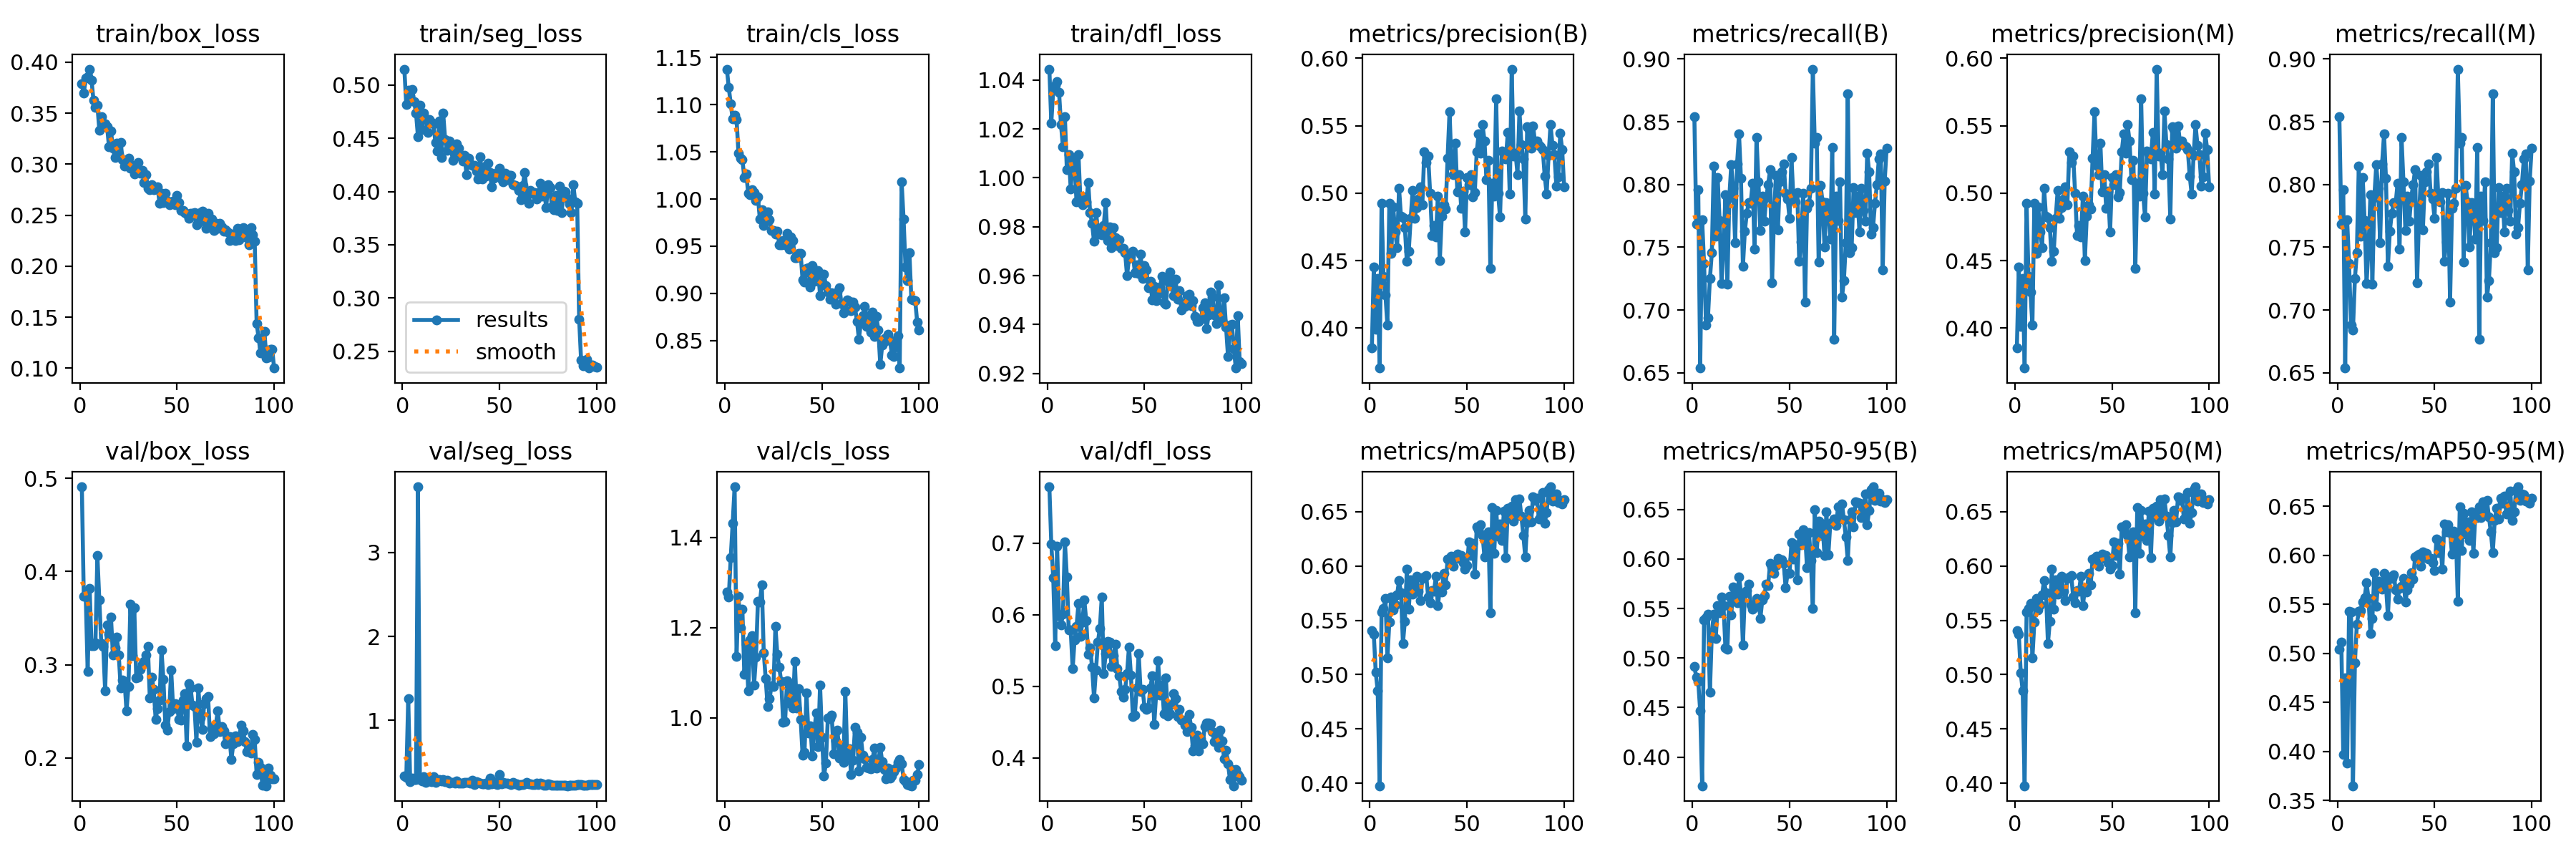

In [9]:
from IPython.display import Image
Image("/content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2/results.png")

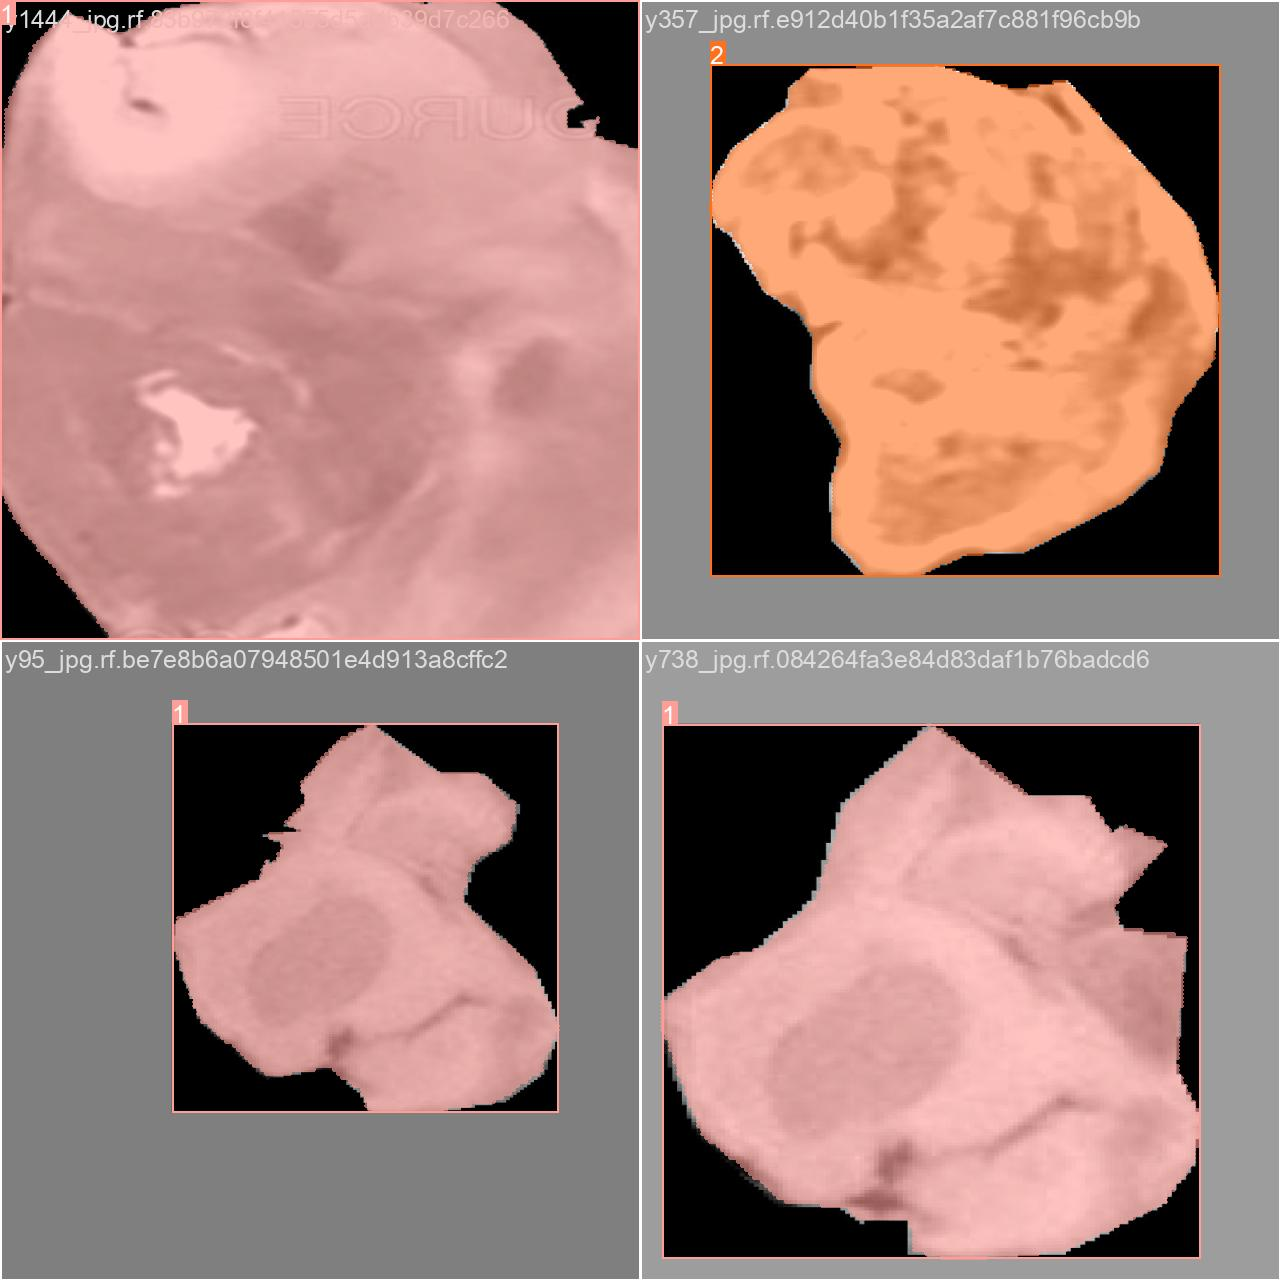

In [10]:
Image(filename='/content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2/train_batch27271.jpg', width=900)

In [11]:
%ls /content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2/weights

best.pt  last.pt


In [12]:
my_new_model = YOLO('/content/drive/MyDrive/InstanceSegmentation/results/100_epochs-2/weights/last.pt')

In [13]:
new_image = '/content/drive/MyDrive/InstanceSegmentation/test/images/y9_jpg.rf.dc7381136c33cc79afa9ce3644993375.jpg'
new_results = my_new_model.predict(new_image, conf=0.5)


image 1/1 /content/drive/MyDrive/InstanceSegmentation/test/images/y9_jpg.rf.dc7381136c33cc79afa9ce3644993375.jpg: 640x640 1 tumor_moderate_chance, 9.4ms
Speed: 5.8ms preprocess, 9.4ms inference, 860.0ms postprocess per image at shape (1, 3, 640, 640)


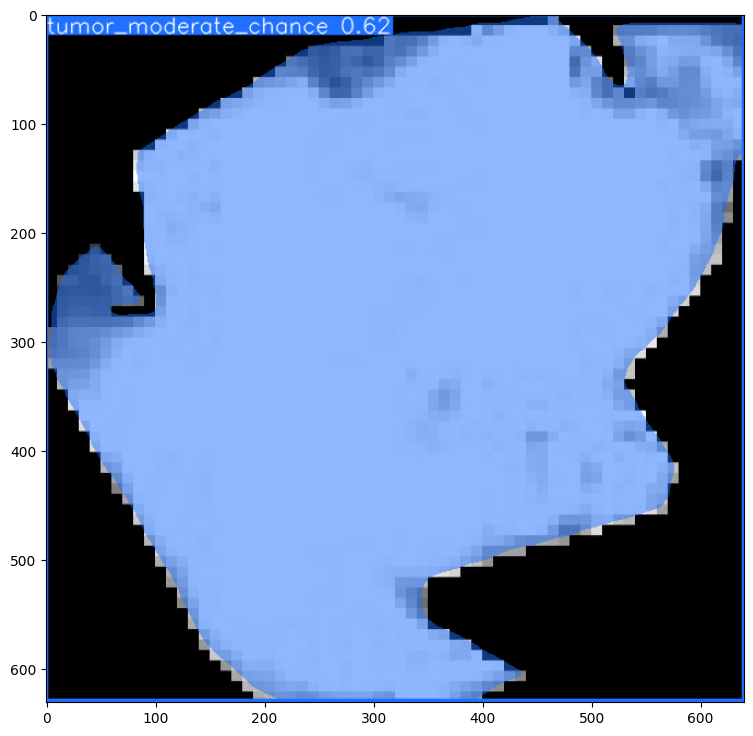

In [14]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(9, 9))
plt.imshow(new_result_array)


0: 640x640 1 tumor_good_chance, 1: 640x640 1 tumor_moderate_chance, 45.2ms
Speed: 4.3ms preprocess, 22.6ms inference, 11.1ms postprocess per image at shape (1, 3, 640, 640)


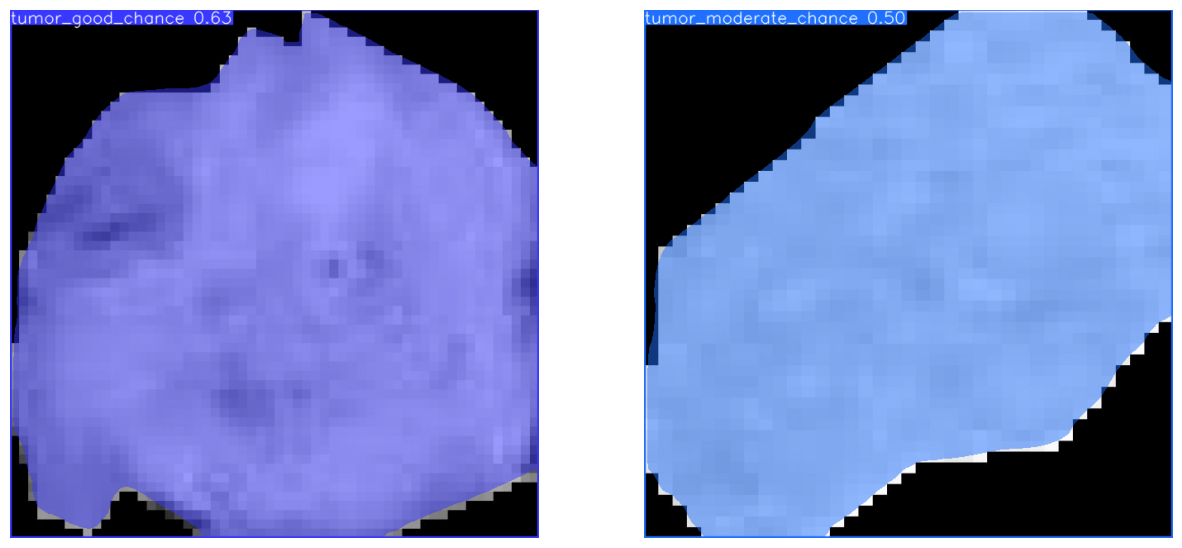

In [16]:
import os
import random
import matplotlib.pyplot as plt
test_folder = '/content/drive/MyDrive/InstanceSegmentation/test/images/'
test_image_names = os.listdir(test_folder)
selected_images = random.sample([os.path.join(test_folder, image_name) for image_name in test_image_names], 2)
new_results = my_new_model.predict(selected_images, conf=0.5)
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
for i in range(2):
    result_array = new_results[i].plot()
    axs[i].imshow(result_array)
    axs[i].axis('off')
plt.savefig('/content/drive/MyDrive/InstanceSegmentation/results/result_image.jpg')
plt.show()
